In [1]:
def store_result(cur_result_list,i_method,i_history,i_train_acc,i_train_loss,i_test_acc,i_test_loss):
    new_result = {
        'method':i_method,
        'history':i_history,
        'acc':i_train_acc,
        'loss':i_train_loss,
        'test_acc':i_test_acc,
        'test_loss':i_test_loss
    }
    cur_result_list.append(new_result)
    return cur_result_list
result_list = []

In [2]:
import PIL
import pathlib
from PIL import Image
# import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
import pathlib
dir_path = './train'
dir_path = pathlib.Path(dir_path)


In [4]:
list(dir_path.glob('*.jpg'))

[PosixPath('train/dog.8011.jpg'),
 PosixPath('train/cat.5077.jpg'),
 PosixPath('train/dog.7322.jpg'),
 PosixPath('train/cat.2718.jpg'),
 PosixPath('train/cat.10151.jpg'),
 PosixPath('train/cat.3406.jpg'),
 PosixPath('train/dog.1753.jpg'),
 PosixPath('train/cat.4369.jpg'),
 PosixPath('train/cat.7660.jpg'),
 PosixPath('train/dog.5535.jpg'),
 PosixPath('train/cat.8553.jpg'),
 PosixPath('train/cat.9895.jpg'),
 PosixPath('train/cat.1211.jpg'),
 PosixPath('train/dog.3144.jpg'),
 PosixPath('train/dog.775.jpg'),
 PosixPath('train/dog.11102.jpg'),
 PosixPath('train/cat.6218.jpg'),
 PosixPath('train/dog.11664.jpg'),
 PosixPath('train/dog.3622.jpg'),
 PosixPath('train/cat.1577.jpg'),
 PosixPath('train/cat.12020.jpg'),
 PosixPath('train/dog.5253.jpg'),
 PosixPath('train/cat.7106.jpg'),
 PosixPath('train/cat.8235.jpg'),
 PosixPath('train/cat.952.jpg'),
 PosixPath('train/dog.9469.jpg'),
 PosixPath('train/dog.1035.jpg'),
 PosixPath('train/cat.3360.jpg'),
 PosixPath('train/cat.11529.jpg'),
 PosixPath(

In [5]:
len(list(dir_path.glob('*.jpg')))

25000

In [6]:
cat = list(dir_path.glob('*cat*.jpg'))
dog = list(dir_path.glob('*dog*.jpg'))

In [7]:
len(cat),len(dog)

(12500, 12500)

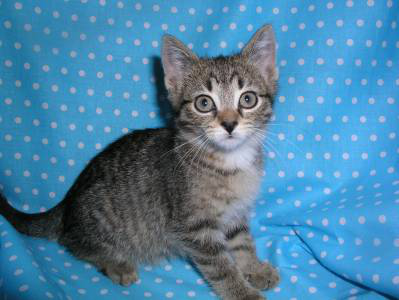

In [8]:
PIL.Image.open(str(cat[0])) 

In [9]:
PIL.Image.open(str(cat[0])).size

(399, 300)

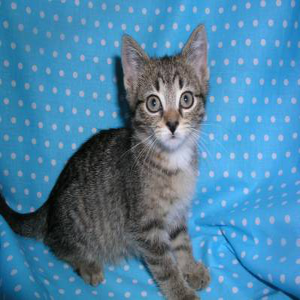

In [10]:
PIL.Image.open(str(cat[0])).resize((300,300))

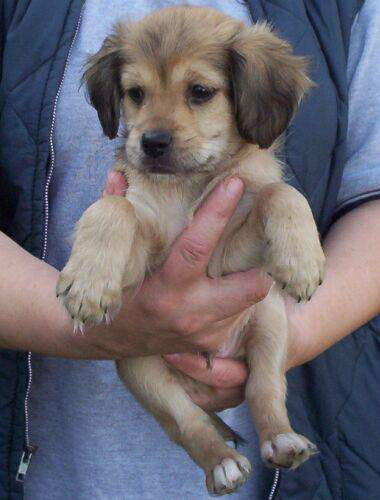

In [11]:
PIL.Image.open(str(dog[0]))

In [12]:
PIL.Image.open(str(dog[0])).size

(380, 500)

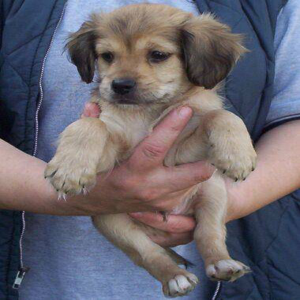

In [111]:
PIL.Image.open(str(dog[0])).resize((300,300))

In [14]:
# np.asarray(img)

In [15]:
animal_images_dict = {
    'cat':cat,
    'dog':dog
}

animal_labels_dict = {
    'cat':0,
    'dog':1
}

In [16]:
X = []
y = []

for animal, images in animal_images_dict.items():
    for image in images:
        resized_img=PIL.Image.open(str(image)).resize((300,300))
        resized_img = np.asarray(resized_img)
        X.append(resized_img)
        y.append(animal_labels_dict[animal])
    

In [18]:
X_n = np.array(X)
y_n = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_n,y_n,shuffle=True)

In [20]:
X_train = X_train[:4000]
X_test = X_test[:1000]
y_train = y_train[:4000]
y_test = y_test[:1000]

In [21]:
X_train_normalized = X_train/255
X_test_normalized = X_test/255
y_train = y_train
y_test = y_test

In [22]:
X_train_normalized.shape,X_test_normalized.shape

((4000, 300, 300, 3), (1000, 300, 300, 3))

In [23]:
X_train_tensor=tf.convert_to_tensor(X_train_normalized)
X_test_tensor=tf.convert_to_tensor(X_test_normalized)
y_train_tensor=tf.convert_to_tensor(y_train)
y_test_tensor=tf.convert_to_tensor(y_test)

Metal device set to: Apple M1


2022-04-14 01:03:27.523252: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-14 01:03:27.524640: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


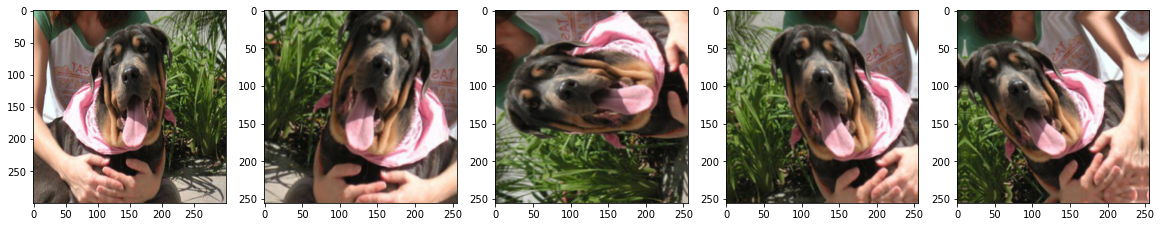

In [380]:
with tf.device("/cpu:0"):
    aug=keras.Sequential([
            layers.experimental.preprocessing.RandomRotation(0.3),
            layers.experimental.preprocessing.RandomCrop(256,256),
            layers.experimental.preprocessing.RandomZoom(0.1),
            layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(300,300,3))
            ])
fig,axs = plt.subplots(1,5,figsize=(20,20))
axs[0].imshow(X_train_tensor[0])
for i in range(4):
    aug_img = aug(X_train_tensor[0:1])
    axs[i+1].imshow(aug_img[0])
    

# Training

In [24]:
model_method = 'CNN'
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model_history = model.fit(X_train_tensor,y_train_tensor,validation_data=(X_test_tensor,y_test_tensor),epochs=15)


train_loss = model_history.history['loss']
train_acc = model_history.history['accuracy']
test_loss = model_history.history['val_loss']
test_acc = model_history.history['val_accuracy']
store_result(result_list,model_method,model_history,train_acc,train_loss,test_acc,test_loss)

2022-04-14 01:03:29.134550: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-14 01:03:29.135544: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15


2022-04-14 01:03:29.418868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8301 - accuracy: 0.5463

2022-04-14 01:04:05.360915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 40s 309ms/step - loss: 0.8301 - accuracy: 0.5463 - val_loss: 0.6526 - val_accuracy: 0.6400
Epoch 2/15
125/125 [==============================] - 41s 331ms/step - loss: 0.6385 - accuracy: 0.6403 - val_loss: 0.6079 - val_accuracy: 0.6770
Epoch 3/15
125/125 [==============================] - 41s 328ms/step - loss: 0.5505 - accuracy: 0.7240 - val_loss: 0.5746 - val_accuracy: 0.6990
Epoch 4/15
125/125 [==============================] - 40s 317ms/step - loss: 0.4529 - accuracy: 0.7955 - val_loss: 0.5921 - val_accuracy: 0.7100
Epoch 5/15
125/125 [==============================] - 42s 334ms/step - loss: 0.3326 - accuracy: 0.8560 - val_loss: 0.6993 - val_accuracy: 0.6540
Epoch 6/15
125/125 [==============================] - 40s 320ms/step - loss: 0.1985 - accuracy: 0.9230 - val_loss: 0.8437 - val_accuracy: 0.6870
Epoch 7/15
125/125 [==============================] - 42s 337ms/step - loss: 0.1101 - accuracy: 0.9578 - val_loss: 1.2000 - val_accuracy: 0.6

[{'method': 'CNN',
  'history': <tensorflow.python.keras.callbacks.History at 0x17e571d30>,
  'acc': [0.54625004529953,
   0.640250027179718,
   0.7240000367164612,
   0.7955000400543213,
   0.8560000658035278,
   0.9230000376701355,
   0.9577500224113464,
   0.9787500500679016,
   0.9915000200271606,
   0.999000072479248,
   0.999750018119812,
   1.0,
   1.0,
   1.0,
   1.0],
  'loss': [0.8300836682319641,
   0.6385049819946289,
   0.5505175590515137,
   0.4529486298561096,
   0.33263733983039856,
   0.19853255152702332,
   0.11005987226963043,
   0.06532427668571472,
   0.02499457262456417,
   0.008656150661408901,
   0.0022468226961791515,
   0.0007224438595585525,
   0.0003587681567296386,
   0.0002328021073481068,
   0.00018036745314020663],
  'test_acc': [0.64000004529953,
   0.6770000457763672,
   0.6990000605583191,
   0.7100000381469727,
   0.6540000438690186,
   0.687000036239624,
   0.6680000424385071,
   0.6780000329017639,
   0.659000039100647,
   0.675000011920929,
   0.6

# Augmentation

# Flip

In [25]:
j=0
with tf.device("/cpu:0"):
    for i in [layers.experimental.preprocessing.RandomFlip( ),
             layers.experimental.preprocessing.RandomFlip("vertical",input_shape=(300,300,3)),
             layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(300,300,3))]:

        method_name =['Flip_hor','Flip_ver','Flip_hor_n_ver']
        model_method = method_name[j]
        j+=1
        data_augmentation = keras.Sequential([
        i
        ])
      
        model = Sequential([
            data_augmentation,
            layers.Conv2D(16,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dense(512,activation='relu'),
            layers.Dense(1,activation='sigmoid')
        ])
        with tf.device("/gpu:0"):
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
            model_history = model.fit(X_train_tensor,y_train_tensor,validation_data=(X_test_tensor,y_test_tensor),epochs=15)            
            
            train_loss = model_history.history['loss']
            train_acc = model_history.history['accuracy']
            test_loss = model_history.history['val_loss']
            test_acc = model_history.history['val_accuracy']

            store_result(result_list,model_method,model_history,train_acc,train_loss,test_acc,test_loss)

Epoch 1/15


2022-04-14 01:13:43.021423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8187 - accuracy: 0.5438

2022-04-14 01:14:21.828584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 43s 333ms/step - loss: 0.8187 - accuracy: 0.5438 - val_loss: 0.6568 - val_accuracy: 0.5890
Epoch 2/15
125/125 [==============================] - 40s 319ms/step - loss: 0.6121 - accuracy: 0.6575 - val_loss: 0.5830 - val_accuracy: 0.7000
Epoch 3/15
125/125 [==============================] - 40s 317ms/step - loss: 0.5351 - accuracy: 0.7293 - val_loss: 0.6134 - val_accuracy: 0.6660
Epoch 4/15
125/125 [==============================] - 42s 336ms/step - loss: 0.4627 - accuracy: 0.7838 - val_loss: 0.5384 - val_accuracy: 0.7450
Epoch 5/15
125/125 [==============================] - 40s 318ms/step - loss: 0.4046 - accuracy: 0.8115 - val_loss: 0.5479 - val_accuracy: 0.7500
Epoch 6/15
125/125 [==============================] - 39s 311ms/step - loss: 0.3255 - accuracy: 0.8633 - val_loss: 0.6054 - val_accuracy: 0.7440
Epoch 7/15
125/125 [==============================] - 40s 323ms/step - loss: 0.2693 - accuracy: 0.8935 - val_loss: 0.6406 - val_accuracy: 0.7

2022-04-14 01:23:35.794185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 1.0573 - accuracy: 0.5275

2022-04-14 01:24:12.227268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 40s 315ms/step - loss: 1.0573 - accuracy: 0.5275 - val_loss: 0.6677 - val_accuracy: 0.5880
Epoch 2/15
125/125 [==============================] - 41s 325ms/step - loss: 0.6474 - accuracy: 0.6058 - val_loss: 0.6399 - val_accuracy: 0.6600
Epoch 3/15
125/125 [==============================] - 39s 313ms/step - loss: 0.5979 - accuracy: 0.6733 - val_loss: 0.5742 - val_accuracy: 0.6940
Epoch 4/15
125/125 [==============================] - 39s 309ms/step - loss: 0.5615 - accuracy: 0.7065 - val_loss: 0.6137 - val_accuracy: 0.6450
Epoch 5/15
125/125 [==============================] - 38s 304ms/step - loss: 0.5194 - accuracy: 0.7413 - val_loss: 0.5892 - val_accuracy: 0.6870
Epoch 6/15
125/125 [==============================] - 38s 305ms/step - loss: 0.4580 - accuracy: 0.7795 - val_loss: 0.6139 - val_accuracy: 0.7100
Epoch 7/15
125/125 [==============================] - 38s 305ms/step - loss: 0.3942 - accuracy: 0.8233 - val_loss: 0.6186 - val_accuracy: 0.6

2022-04-14 01:33:20.358632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8726 - accuracy: 0.5490

2022-04-14 01:33:59.077091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 43s 333ms/step - loss: 0.8726 - accuracy: 0.5490 - val_loss: 0.6468 - val_accuracy: 0.6080
Epoch 2/15
125/125 [==============================] - 40s 318ms/step - loss: 0.6415 - accuracy: 0.6188 - val_loss: 0.6287 - val_accuracy: 0.6550
Epoch 3/15
125/125 [==============================] - 40s 318ms/step - loss: 0.6243 - accuracy: 0.6465 - val_loss: 0.6208 - val_accuracy: 0.6620
Epoch 4/15
125/125 [==============================] - 42s 334ms/step - loss: 0.5758 - accuracy: 0.7008 - val_loss: 0.5708 - val_accuracy: 0.7100
Epoch 5/15
125/125 [==============================] - 42s 331ms/step - loss: 0.5629 - accuracy: 0.7110 - val_loss: 0.6063 - val_accuracy: 0.6840
Epoch 6/15
125/125 [==============================] - 40s 322ms/step - loss: 0.5055 - accuracy: 0.7543 - val_loss: 0.5411 - val_accuracy: 0.7320
Epoch 7/15
125/125 [==============================] - 40s 323ms/step - loss: 0.4697 - accuracy: 0.7793 - val_loss: 0.5642 - val_accuracy: 0.6

# Zoom

In [26]:

j=0
with tf.device("/cpu:0"):
    for i in [layers.experimental.preprocessing.RandomZoom(0.1),
             layers.experimental.preprocessing.RandomZoom(0.2),
             layers.experimental.preprocessing.RandomZoom(0.3),]:

        method_name =['Zoom_0.1','Zoom_0.2','Zoom_0.3']
        model_method = method_name[j]
        j+=1
        data_augmentation = keras.Sequential([
        i
        ])


        
        model = Sequential([
            data_augmentation,
            layers.Conv2D(16,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dense(512,activation='relu'),
            layers.Dense(1,activation='sigmoid')
        ])
        with tf.device("/gpu:0"):
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
            model_history = model.fit(X_train_tensor,y_train_tensor,validation_data=(X_test_tensor,y_test_tensor),epochs=15)            
            train_loss = model_history.history['loss']
            train_acc = model_history.history['accuracy']
            test_loss = model_history.history['val_loss']
            test_acc = model_history.history['val_accuracy']

            store_result(result_list,model_method,model_history,train_acc,train_loss,test_acc,test_loss)

Epoch 1/15


2022-04-14 01:43:34.685102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8114 - accuracy: 0.5278

2022-04-14 01:44:18.902571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 49s 376ms/step - loss: 0.8114 - accuracy: 0.5278 - val_loss: 0.6672 - val_accuracy: 0.5590
Epoch 2/15
125/125 [==============================] - 44s 351ms/step - loss: 0.6574 - accuracy: 0.5878 - val_loss: 0.6664 - val_accuracy: 0.5820
Epoch 3/15
125/125 [==============================] - 43s 346ms/step - loss: 0.6252 - accuracy: 0.6365 - val_loss: 0.6405 - val_accuracy: 0.6450
Epoch 4/15
125/125 [==============================] - 42s 334ms/step - loss: 0.5922 - accuracy: 0.6683 - val_loss: 0.5795 - val_accuracy: 0.6970
Epoch 5/15
125/125 [==============================] - 40s 321ms/step - loss: 0.5286 - accuracy: 0.7285 - val_loss: 0.5456 - val_accuracy: 0.7140
Epoch 6/15
125/125 [==============================] - 42s 332ms/step - loss: 0.4857 - accuracy: 0.7638 - val_loss: 0.5553 - val_accuracy: 0.7380
Epoch 7/15
125/125 [==============================] - 44s 351ms/step - loss: 0.4192 - accuracy: 0.8110 - val_loss: 0.5534 - val_accuracy: 0.7

2022-04-14 01:54:15.647027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8266 - accuracy: 0.5558

2022-04-14 01:54:57.102672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 45s 350ms/step - loss: 0.8266 - accuracy: 0.5558 - val_loss: 0.6547 - val_accuracy: 0.5580
Epoch 2/15
125/125 [==============================] - 44s 351ms/step - loss: 0.6380 - accuracy: 0.6175 - val_loss: 0.6302 - val_accuracy: 0.6160
Epoch 3/15
125/125 [==============================] - 42s 337ms/step - loss: 0.5876 - accuracy: 0.6775 - val_loss: 0.5619 - val_accuracy: 0.7250
Epoch 4/15
125/125 [==============================] - 41s 330ms/step - loss: 0.5466 - accuracy: 0.7218 - val_loss: 0.5462 - val_accuracy: 0.7140
Epoch 5/15
125/125 [==============================] - 42s 338ms/step - loss: 0.5076 - accuracy: 0.7495 - val_loss: 0.5376 - val_accuracy: 0.7380
Epoch 6/15
125/125 [==============================] - 43s 348ms/step - loss: 0.4621 - accuracy: 0.7765 - val_loss: 0.5056 - val_accuracy: 0.7590
Epoch 7/15
125/125 [==============================] - 41s 329ms/step - loss: 0.4086 - accuracy: 0.8140 - val_loss: 0.5263 - val_accuracy: 0.7

2022-04-14 02:04:53.171552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8801 - accuracy: 0.5305

2022-04-14 02:05:32.182685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 43s 330ms/step - loss: 0.8801 - accuracy: 0.5305 - val_loss: 0.6722 - val_accuracy: 0.5800
Epoch 2/15
125/125 [==============================] - 44s 351ms/step - loss: 0.6721 - accuracy: 0.5588 - val_loss: 0.6558 - val_accuracy: 0.6000
Epoch 3/15
125/125 [==============================] - 40s 321ms/step - loss: 0.6542 - accuracy: 0.5980 - val_loss: 0.6362 - val_accuracy: 0.6250
Epoch 4/15
125/125 [==============================] - 40s 318ms/step - loss: 0.6197 - accuracy: 0.6383 - val_loss: 0.5975 - val_accuracy: 0.6790
Epoch 5/15
125/125 [==============================] - 42s 336ms/step - loss: 0.5940 - accuracy: 0.6750 - val_loss: 0.5971 - val_accuracy: 0.6820
Epoch 6/15
125/125 [==============================] - 42s 336ms/step - loss: 0.5602 - accuracy: 0.6978 - val_loss: 0.5688 - val_accuracy: 0.7040
Epoch 7/15
125/125 [==============================] - 42s 339ms/step - loss: 0.5281 - accuracy: 0.7238 - val_loss: 0.5505 - val_accuracy: 0.7

# Rotation

In [27]:

j=0
with tf.device("/cpu:0"):
    for i in [layers.experimental.preprocessing.RandomRotation(0.1),
             layers.experimental.preprocessing.RandomRotation(0.2),
             layers.experimental.preprocessing.RandomRotation(0.3)]:

        method_name =['Rotation_0.1','Rotation_0.2','Rotation_0.3']
        model_method = method_name[j]
        j+=1
        data_augmentation = keras.Sequential([
        i
        ])


        
        model = Sequential([
            data_augmentation,
            layers.Conv2D(16,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dense(512,activation='relu'),
            layers.Dense(1,activation='sigmoid')
        ])
        with tf.device("/gpu:0"):
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
            model_history = model.fit(X_train_tensor,y_train_tensor,validation_data=(X_test_tensor,y_test_tensor),epochs=15)
            
            train_loss = model_history.history['loss']
            train_acc = model_history.history['accuracy']
            test_loss = model_history.history['val_loss']
            test_acc = model_history.history['val_accuracy']

            store_result(result_list,model_method,model_history,train_acc,train_loss,test_acc,test_loss)

Epoch 1/15


2022-04-14 02:15:21.498312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8121 - accuracy: 0.5293

2022-04-14 02:16:01.301364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 44s 334ms/step - loss: 0.8121 - accuracy: 0.5293 - val_loss: 0.6737 - val_accuracy: 0.5540
Epoch 2/15
125/125 [==============================] - 41s 325ms/step - loss: 0.6697 - accuracy: 0.5725 - val_loss: 0.6512 - val_accuracy: 0.5920
Epoch 3/15
125/125 [==============================] - 40s 320ms/step - loss: 0.6504 - accuracy: 0.6170 - val_loss: 0.6436 - val_accuracy: 0.6620
Epoch 4/15
125/125 [==============================] - 39s 315ms/step - loss: 0.6235 - accuracy: 0.6465 - val_loss: 0.5982 - val_accuracy: 0.6710
Epoch 5/15
125/125 [==============================] - 40s 316ms/step - loss: 0.5835 - accuracy: 0.6865 - val_loss: 0.5695 - val_accuracy: 0.7080
Epoch 6/15
125/125 [==============================] - 41s 325ms/step - loss: 0.5555 - accuracy: 0.7168 - val_loss: 0.6064 - val_accuracy: 0.6990
Epoch 7/15
125/125 [==============================] - 46s 365ms/step - loss: 0.5345 - accuracy: 0.7265 - val_loss: 0.5552 - val_accuracy: 0.7

2022-04-14 02:25:41.861958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8311 - accuracy: 0.5567

2022-04-14 02:26:20.739352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 42s 329ms/step - loss: 0.8311 - accuracy: 0.5567 - val_loss: 0.6851 - val_accuracy: 0.5510
Epoch 2/15
125/125 [==============================] - 44s 355ms/step - loss: 0.6663 - accuracy: 0.5923 - val_loss: 0.6545 - val_accuracy: 0.6250
Epoch 3/15
125/125 [==============================] - 44s 353ms/step - loss: 0.6611 - accuracy: 0.5955 - val_loss: 0.6817 - val_accuracy: 0.5450
Epoch 4/15
125/125 [==============================] - 43s 341ms/step - loss: 0.6656 - accuracy: 0.5748 - val_loss: 0.6447 - val_accuracy: 0.6200
Epoch 5/15
125/125 [==============================] - 42s 334ms/step - loss: 0.6163 - accuracy: 0.6600 - val_loss: 0.6123 - val_accuracy: 0.6740
Epoch 6/15
125/125 [==============================] - 42s 336ms/step - loss: 0.5975 - accuracy: 0.6748 - val_loss: 0.6271 - val_accuracy: 0.6610
Epoch 7/15
125/125 [==============================] - 41s 327ms/step - loss: 0.5983 - accuracy: 0.6825 - val_loss: 0.5874 - val_accuracy: 0.6

2022-04-14 02:36:17.723173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.7878 - accuracy: 0.5383

2022-04-14 02:36:56.639069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 43s 332ms/step - loss: 0.7878 - accuracy: 0.5383 - val_loss: 0.6707 - val_accuracy: 0.6250
Epoch 2/15
125/125 [==============================] - 41s 326ms/step - loss: 0.6631 - accuracy: 0.5893 - val_loss: 0.6321 - val_accuracy: 0.6420
Epoch 3/15
125/125 [==============================] - 41s 324ms/step - loss: 0.6403 - accuracy: 0.6265 - val_loss: 0.6354 - val_accuracy: 0.6540
Epoch 4/15
125/125 [==============================] - 40s 319ms/step - loss: 0.6092 - accuracy: 0.6583 - val_loss: 0.6072 - val_accuracy: 0.6680
Epoch 5/15
125/125 [==============================] - 40s 320ms/step - loss: 0.6070 - accuracy: 0.6608 - val_loss: 0.5743 - val_accuracy: 0.7070
Epoch 6/15
125/125 [==============================] - 39s 314ms/step - loss: 0.5963 - accuracy: 0.6833 - val_loss: 0.6135 - val_accuracy: 0.6730
Epoch 7/15
125/125 [==============================] - 40s 321ms/step - loss: 0.5823 - accuracy: 0.6845 - val_loss: 0.5794 - val_accuracy: 0.6

# Crop

In [28]:

j=0
with tf.device("/cpu:0"):
    for i in [layers.experimental.preprocessing.RandomCrop(256,256),
             layers.experimental.preprocessing.RandomCrop(192,192),
             layers.experimental.preprocessing.RandomCrop(128,128)]:

        method_name =['Crop_256','Crop_192','Crop_128']
        model_method = method_name[j]
        j+=1
        data_augmentation = keras.Sequential([
        i
        ])


        
        model = Sequential([
            data_augmentation,
            layers.Conv2D(16,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dense(512,activation='relu'),
            layers.Dense(1,activation='sigmoid')
        ])
        with tf.device("/gpu:0"):
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
            model_history = model.fit(X_train_tensor,y_train_tensor,validation_data=(X_test_tensor,y_test_tensor),epochs=15)

            train_loss = model_history.history['loss']
            train_acc = model_history.history['accuracy']
            test_loss = model_history.history['val_loss']
            test_acc = model_history.history['val_accuracy']

            store_result(result_list,model_method,model_history,train_acc,train_loss,test_acc,test_loss)

Epoch 1/15


2022-04-14 02:46:25.687577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.7388 - accuracy: 0.5775

2022-04-14 02:46:55.020465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 33s 253ms/step - loss: 0.7388 - accuracy: 0.5775 - val_loss: 0.6458 - val_accuracy: 0.6210
Epoch 2/15
125/125 [==============================] - 28s 226ms/step - loss: 0.6437 - accuracy: 0.6135 - val_loss: 0.6210 - val_accuracy: 0.6450
Epoch 3/15
125/125 [==============================] - 29s 228ms/step - loss: 0.6002 - accuracy: 0.6628 - val_loss: 0.6037 - val_accuracy: 0.6850
Epoch 4/15
125/125 [==============================] - 29s 231ms/step - loss: 0.5732 - accuracy: 0.6925 - val_loss: 0.5625 - val_accuracy: 0.7250
Epoch 5/15
125/125 [==============================] - 30s 237ms/step - loss: 0.5397 - accuracy: 0.7165 - val_loss: 0.5373 - val_accuracy: 0.7320
Epoch 6/15
125/125 [==============================] - 29s 229ms/step - loss: 0.5181 - accuracy: 0.7380 - val_loss: 0.5301 - val_accuracy: 0.7280
Epoch 7/15
125/125 [==============================] - 29s 235ms/step - loss: 0.4886 - accuracy: 0.7640 - val_loss: 0.5032 - val_accuracy: 0.7

2022-04-14 02:54:00.821778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.7442 - accuracy: 0.5385

2022-04-14 02:54:19.113038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 21s 157ms/step - loss: 0.7442 - accuracy: 0.5385 - val_loss: 0.6547 - val_accuracy: 0.5920
Epoch 2/15
125/125 [==============================] - 19s 151ms/step - loss: 0.6588 - accuracy: 0.5858 - val_loss: 0.6515 - val_accuracy: 0.6120
Epoch 3/15
125/125 [==============================] - 20s 162ms/step - loss: 0.6533 - accuracy: 0.6050 - val_loss: 0.6333 - val_accuracy: 0.6440
Epoch 4/15
125/125 [==============================] - 20s 159ms/step - loss: 0.6376 - accuracy: 0.6255 - val_loss: 0.6207 - val_accuracy: 0.6490
Epoch 5/15
125/125 [==============================] - 20s 161ms/step - loss: 0.6176 - accuracy: 0.6495 - val_loss: 0.6163 - val_accuracy: 0.6640
Epoch 6/15
125/125 [==============================] - 19s 151ms/step - loss: 0.5957 - accuracy: 0.6793 - val_loss: 0.5887 - val_accuracy: 0.6900
Epoch 7/15
125/125 [==============================] - 19s 149ms/step - loss: 0.5733 - accuracy: 0.7005 - val_loss: 0.5864 - val_accuracy: 0.6

2022-04-14 02:58:45.872169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.7016 - accuracy: 0.5143

2022-04-14 02:58:56.517218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 13s 94ms/step - loss: 0.7016 - accuracy: 0.5143 - val_loss: 0.6855 - val_accuracy: 0.5150
Epoch 2/15
125/125 [==============================] - 12s 96ms/step - loss: 0.6815 - accuracy: 0.5565 - val_loss: 0.6706 - val_accuracy: 0.5740
Epoch 3/15
125/125 [==============================] - 12s 94ms/step - loss: 0.6727 - accuracy: 0.5685 - val_loss: 0.7021 - val_accuracy: 0.5480
Epoch 4/15
125/125 [==============================] - 12s 93ms/step - loss: 0.6707 - accuracy: 0.5723 - val_loss: 0.6699 - val_accuracy: 0.5590
Epoch 5/15
125/125 [==============================] - 12s 94ms/step - loss: 0.6658 - accuracy: 0.5808 - val_loss: 0.6821 - val_accuracy: 0.5180
Epoch 6/15
125/125 [==============================] - 12s 99ms/step - loss: 0.6553 - accuracy: 0.6180 - val_loss: 0.6572 - val_accuracy: 0.6180
Epoch 7/15
125/125 [==============================] - 12s 94ms/step - loss: 0.6450 - accuracy: 0.6160 - val_loss: 0.6508 - val_accuracy: 0.6300
Epo

# Gaussion Noise

In [367]:

j=0
with tf.device("/cpu:0"):
    for i in [layers.GaussianNoise(0.1),
             layers.GaussianNoise(0.2),
             layers.GaussianNoise(0.3)]:

        method_name =['Gaussian_0.1','Gaussian_0.2','Gaussian_0.3']
        model_method = method_name[j]
        j+=1
        data_augmentation = keras.Sequential([
        i
        ])


        
        model = Sequential([
            data_augmentation,
            layers.Conv2D(16,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dense(512,activation='relu'),
            layers.Dense(1,activation='sigmoid')
        ])
        with tf.device("/gpu:0"):
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
            model_history = model.fit(X_train_tensor,y_train_tensor,validation_data=(X_test_tensor,y_test_tensor),epochs=15)

            train_loss = model_history.history['loss']
            train_acc = model_history.history['accuracy']
            test_loss = model_history.history['val_loss']
            test_acc = model_history.history['val_accuracy']

            store_result(result_list,model_method,model_history,train_acc,train_loss,test_acc,test_loss)

Epoch 1/15


2022-04-14 14:43:12.428226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.7954 - accuracy: 0.5260

2022-04-14 14:43:59.461130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 54s 402ms/step - loss: 0.7954 - accuracy: 0.5260 - val_loss: 0.6724 - val_accuracy: 0.5810
Epoch 2/15
125/125 [==============================] - 49s 396ms/step - loss: 0.6558 - accuracy: 0.5933 - val_loss: 0.6766 - val_accuracy: 0.6030
Epoch 3/15
125/125 [==============================] - 50s 400ms/step - loss: 0.6418 - accuracy: 0.6268 - val_loss: 0.6590 - val_accuracy: 0.6060
Epoch 4/15
125/125 [==============================] - 48s 384ms/step - loss: 0.6092 - accuracy: 0.6703 - val_loss: 0.6480 - val_accuracy: 0.6350
Epoch 5/15
125/125 [==============================] - 46s 365ms/step - loss: 0.5614 - accuracy: 0.7020 - val_loss: 0.6358 - val_accuracy: 0.6570
Epoch 6/15
125/125 [==============================] - 46s 365ms/step - loss: 0.4850 - accuracy: 0.7675 - val_loss: 0.6648 - val_accuracy: 0.6380
Epoch 7/15
125/125 [==============================] - 45s 360ms/step - loss: 0.3693 - accuracy: 0.8398 - val_loss: 0.7829 - val_accuracy: 0.6

2022-04-14 14:54:47.357361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.9471 - accuracy: 0.5088

2022-04-14 14:55:30.576503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 48s 368ms/step - loss: 0.9471 - accuracy: 0.5088 - val_loss: 0.6924 - val_accuracy: 0.5140
Epoch 2/15
125/125 [==============================] - 46s 369ms/step - loss: 0.6887 - accuracy: 0.5368 - val_loss: 0.6912 - val_accuracy: 0.5400
Epoch 3/15
125/125 [==============================] - 45s 361ms/step - loss: 0.6807 - accuracy: 0.5665 - val_loss: 0.6918 - val_accuracy: 0.4870
Epoch 4/15
125/125 [==============================] - 45s 361ms/step - loss: 0.6701 - accuracy: 0.5795 - val_loss: 0.6891 - val_accuracy: 0.4880
Epoch 5/15
125/125 [==============================] - 45s 362ms/step - loss: 0.6542 - accuracy: 0.6048 - val_loss: 0.6795 - val_accuracy: 0.4980
Epoch 6/15
125/125 [==============================] - 46s 366ms/step - loss: 0.6211 - accuracy: 0.6375 - val_loss: 0.6870 - val_accuracy: 0.5590
Epoch 7/15
125/125 [==============================] - 45s 360ms/step - loss: 0.6099 - accuracy: 0.6570 - val_loss: 0.6800 - val_accuracy: 0.5

2022-04-14 15:06:17.048745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.8568 - accuracy: 0.5238

2022-04-14 15:07:01.143315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 49s 377ms/step - loss: 0.8568 - accuracy: 0.5238 - val_loss: 0.6887 - val_accuracy: 0.5050
Epoch 2/15
125/125 [==============================] - 45s 363ms/step - loss: 0.6703 - accuracy: 0.5900 - val_loss: 0.6826 - val_accuracy: 0.4880
Epoch 3/15
125/125 [==============================] - 45s 358ms/step - loss: 0.6622 - accuracy: 0.5875 - val_loss: 0.6869 - val_accuracy: 0.4860
Epoch 4/15
125/125 [==============================] - 44s 352ms/step - loss: 0.6415 - accuracy: 0.6315 - val_loss: 0.6765 - val_accuracy: 0.5660
Epoch 5/15
125/125 [==============================] - 48s 385ms/step - loss: 0.6295 - accuracy: 0.6395 - val_loss: 0.7019 - val_accuracy: 0.4940
Epoch 6/15
125/125 [==============================] - 49s 391ms/step - loss: 0.6086 - accuracy: 0.6678 - val_loss: 0.6686 - val_accuracy: 0.5920
Epoch 7/15
125/125 [==============================] - 45s 358ms/step - loss: 0.5424 - accuracy: 0.7253 - val_loss: 0.6612 - val_accuracy: 0.6

# Combination

In [ ]:
# FLIP_1 0.76 zoom_3 0.78 rotation_1 0.77 crop_0.78 gaussian_1 0.67

In [369]:


with tf.device("/cpu:0"):

        data_augmentation = keras.Sequential([
#         layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(300,300,3)),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomCrop(256,256),
        ])

model_method = 'conbination'
        
model = Sequential([
            data_augmentation,
            layers.Conv2D(16,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64,3,padding='same',activation='relu'),
            layers.MaxPooling2D(),
            layers.Dropout(0.2),
            layers.Flatten(),
            layers.Dense(512,activation='relu'),
            layers.Dense(1,activation='sigmoid')
        ])

with tf.device("/gpu:0"):
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
            model_history=model.fit(X_train_tensor,y_train_tensor,validation_data=(X_test_tensor,y_test_tensor),epochs=30)            

            train_loss = model_history.history['loss']
            train_acc = model_history.history['accuracy']
            test_loss = model_history.history['val_loss']
            test_acc = model_history.history['val_accuracy']

            store_result(result_list,model_method,model_history,train_acc,train_loss,test_acc,test_loss)
          

Epoch 1/30


2022-04-14 15:18:47.335308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.7838 - accuracy: 0.5250

2022-04-14 15:19:24.303477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 41s 322ms/step - loss: 0.7838 - accuracy: 0.5250 - val_loss: 0.6927 - val_accuracy: 0.5190
Epoch 2/30
125/125 [==============================] - 39s 314ms/step - loss: 0.6775 - accuracy: 0.5678 - val_loss: 0.6835 - val_accuracy: 0.5640
Epoch 3/30
125/125 [==============================] - 40s 318ms/step - loss: 0.6796 - accuracy: 0.5705 - val_loss: 0.6499 - val_accuracy: 0.6580
Epoch 4/30
125/125 [==============================] - 39s 314ms/step - loss: 0.6471 - accuracy: 0.6235 - val_loss: 0.6420 - val_accuracy: 0.6190
Epoch 5/30
125/125 [==============================] - 40s 318ms/step - loss: 0.6232 - accuracy: 0.6415 - val_loss: 0.6108 - val_accuracy: 0.6610
Epoch 6/30
125/125 [==============================] - 40s 323ms/step - loss: 0.6048 - accuracy: 0.6673 - val_loss: 0.5903 - val_accuracy: 0.6850
Epoch 7/30
125/125 [==============================] - 39s 311ms/step - loss: 0.5960 - accuracy: 0.6745 - val_loss: 0.5660 - val_accuracy: 0.7

In [370]:
import pandas as pd
result_df = pd.DataFrame.from_dict(result_list)

In [371]:
result_df

,method,history,acc,loss,test_acc,test_loss
0,CNN,<tensorflow.python.keras.callbacks.History obj...,"[0.54625004529953, 0.640250027179718, 0.724000...","[0.8300836682319641, 0.6385049819946289, 0.550...","[0.64000004529953, 0.6770000457763672, 0.69900...","[0.6526291370391846, 0.607878565788269, 0.5745..."
1,Flip_hor,<tensorflow.python.keras.callbacks.History obj...,"[0.5437500476837158, 0.6575000286102295, 0.729...","[0.8187201023101807, 0.6121012568473816, 0.535...","[0.5890000462532043, 0.7000000476837158, 0.666...","[0.6567996144294739, 0.582956075668335, 0.6133..."
2,Flip_ver,<tensorflow.python.keras.callbacks.History obj...,"[0.5275000333786011, 0.6057500243186951, 0.673...","[1.0572859048843384, 0.6474304795265198, 0.597...","[0.5879999995231628, 0.6600000262260437, 0.694...","[0.6677330732345581, 0.6398525834083557, 0.574..."
3,Flip_hor_n_ver,<tensorflow.python.keras.callbacks.History obj...,"[0.5490000247955322, 0.6187500357627869, 0.646...","[0.8725936412811279, 0.6415159106254578, 0.624...","[0.6080000400543213, 0.6550000309944153, 0.662...","[0.646767258644104, 0.6286848783493042, 0.6208..."
4,Zoom_0.1,<tensorflow.python.keras.callbacks.History obj...,"[0.5277500152587891, 0.5877500176429749, 0.636...","[0.8113829493522644, 0.6573504209518433, 0.625...","[0.5590000152587891, 0.5820000171661377, 0.645...","[0.6671802997589111, 0.6663954257965088, 0.640..."
5,Zoom_0.2,<tensorflow.python.keras.callbacks.History obj...,"[0.5557500123977661, 0.6175000071525574, 0.677...","[0.8266465663909912, 0.6380121111869812, 0.587...","[0.5580000281333923, 0.6160000562667847, 0.725...","[0.654741108417511, 0.6301575303077698, 0.5619..."
6,Zoom_0.3,<tensorflow.python.keras.callbacks.History obj...,"[0.530500054359436, 0.5587500333786011, 0.5980...","[0.8801295757293701, 0.6721411347389221, 0.654...","[0.5800000429153442, 0.6000000238418579, 0.625...","[0.672224760055542, 0.6557781100273132, 0.6362..."
7,Rotation_0.1,<tensorflow.python.keras.callbacks.History obj...,"[0.5292500257492065, 0.5725000500679016, 0.617...","[0.8121153116226196, 0.6696636080741882, 0.650...","[0.5540000200271606, 0.5920000076293945, 0.662...","[0.6736897826194763, 0.6511595249176025, 0.643..."
8,Rotation_0.2,<tensorflow.python.keras.callbacks.History obj...,"[0.5567499995231628, 0.5922500491142273, 0.595...","[0.8310524821281433, 0.6663391590118408, 0.661...","[0.5509999990463257, 0.625, 0.5450000166893005...","[0.6850530505180359, 0.6545116305351257, 0.681..."
9,Rotation_0.3,<tensorflow.python.keras.callbacks.History obj...,"[0.5382500290870667, 0.5892500281333923, 0.626...","[0.7878435254096985, 0.6630750298500061, 0.640...","[0.625, 0.6420000195503235, 0.6540000438690186...","[0.6706832647323608, 0.6320943236351013, 0.635..."


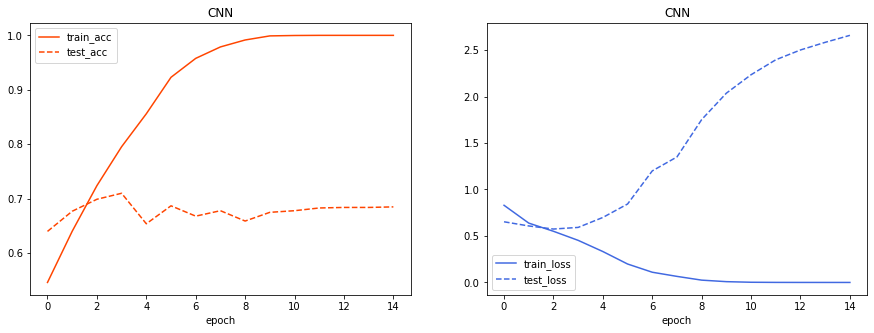

In [381]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(result_df['acc'][0],'orangered',label='train_acc')
axs[0].plot(result_df['test_acc'][0],'orangered',linestyle='--',label='test_acc')
axs[0].set_title('CNN')
axs[0].legend(loc='upper left')

axs[1].plot(result_df['loss'][0],'royalblue',label='train_loss')
axs[1].plot(result_df['test_loss'][0],'royalblue',linestyle='--',label='test_loss')
axs[1].set_title('CNN')
axs[1].legend(loc='lower left')
axs[0].set_xlabel('epoch')
axs[1].set_xlabel('epoch')
plt.show()

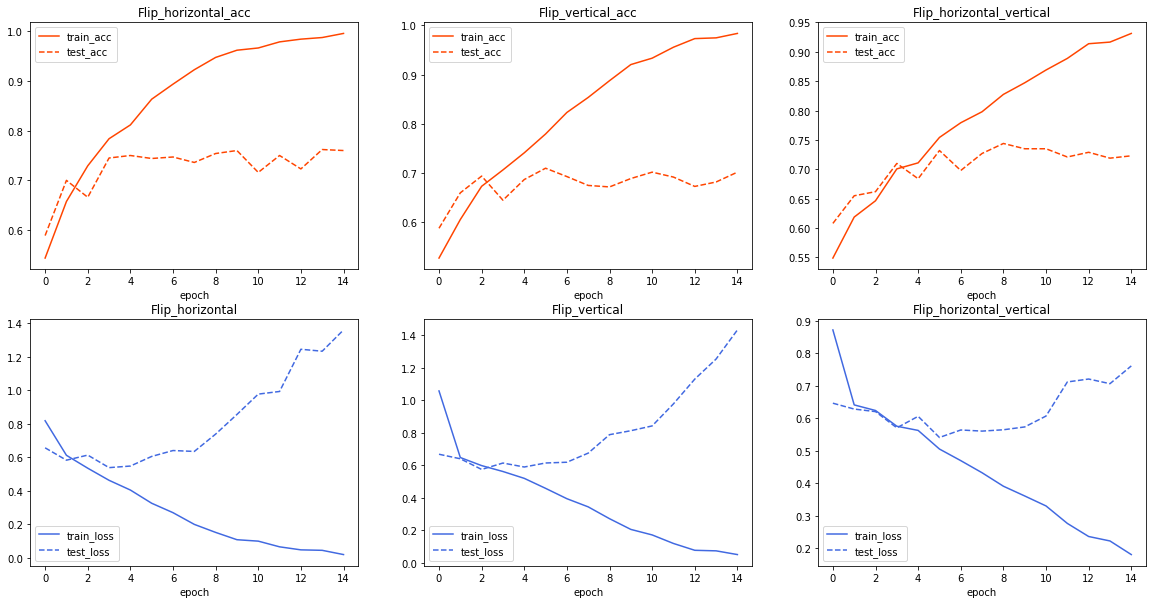

In [328]:
fig,axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].plot(result_df['acc'][1],'orangered',label='train_acc')
axs[0,0].plot(result_df['test_acc'][1],'orangered',linestyle='--',label='test_acc')
axs[0,0].set_title('Flip_horizontal_acc')
axs[0,0].legend(loc='upper left')


axs[0,1].plot(result_df['acc'][2],'orangered',label='train_acc')
axs[0,1].plot(result_df['test_acc'][2],'orangered',linestyle='--',label='test_acc')
axs[0,1].set_title('Flip_vertical_acc')
axs[0,1].legend(loc='upper left')



axs[0,2].plot(result_df['acc'][3],'orangered',label='train_acc')
axs[0,2].plot(result_df['test_acc'][3],'orangered',linestyle='--',label='test_acc')
axs[0,2].set_title('Flip_horizontal_vertical')
axs[0,2].legend(loc='upper left')

    
axs[1,0].plot(result_df['loss'][1],'royalblue',label='train_loss')
axs[1,0].plot(result_df['test_loss'][1],'royalblue',linestyle='--',label='test_loss')
axs[1,0].set_title('Flip_horizontal')
axs[1,0].legend(loc='lower left')


axs[1,1].plot(result_df['loss'][2],'royalblue',label='train_loss')
axs[1,1].plot(result_df['test_loss'][2],'royalblue',linestyle='--',label='test_loss')
axs[1,1].set_title('Flip_vertical')
axs[1,1].legend(loc='lower left')


axs[1,2].plot(result_df['loss'][3],'royalblue',label='train_loss')
axs[1,2].plot(result_df['test_loss'][3],'royalblue',linestyle='--',label='test_loss')
axs[1,2].set_title('Flip_horizontal_vertical')
axs[1,2].legend(loc='lower left')


axs[0,0].set_xlabel('epoch')
axs[0,1].set_xlabel('epoch')
axs[0,2].set_xlabel('epoch')
axs[1,0].set_xlabel('epoch')
axs[1,1].set_xlabel('epoch')
axs[1,2].set_xlabel('epoch')
plt.show()

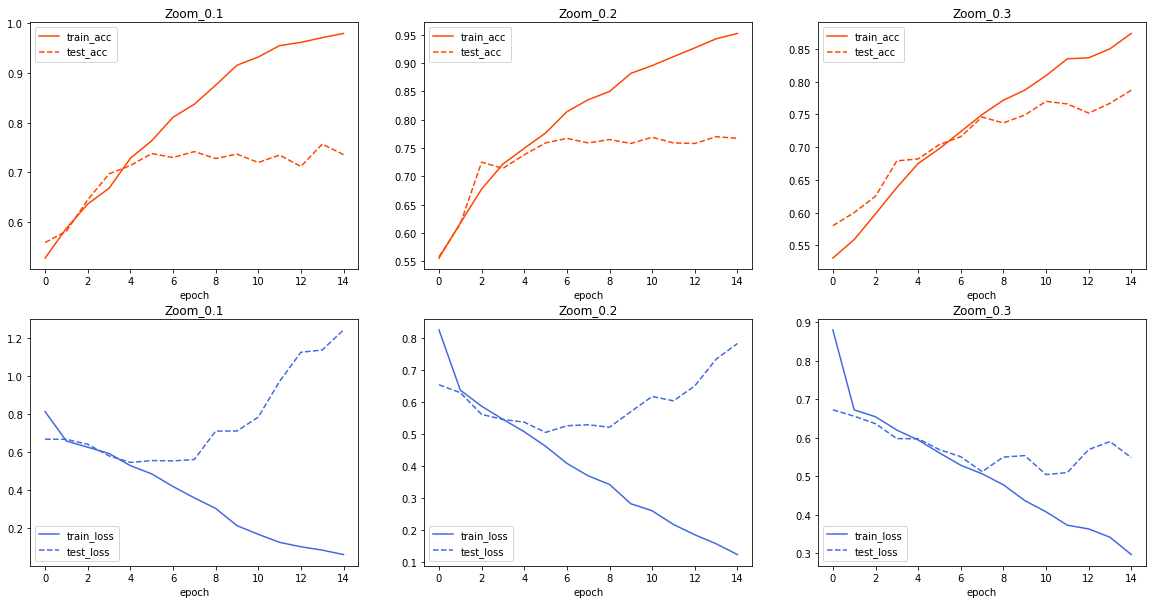

In [327]:
fig,axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].plot(result_df['acc'][4],'orangered',label='train_acc')
axs[0,0].plot(result_df['test_acc'][4],'orangered',linestyle='--',label='test_acc')
axs[0,0].set_title('Zoom_0.1')
axs[0,0].legend(loc='upper left')


axs[0,1].plot(result_df['acc'][5],'orangered',label='train_acc')
axs[0,1].plot(result_df['test_acc'][5],'orangered',linestyle='--',label='test_acc')
axs[0,1].set_title('Zoom_0.2')
axs[0,1].legend(loc='upper left')



axs[0,2].plot(result_df['acc'][6],'orangered',label='train_acc')
axs[0,2].plot(result_df['test_acc'][6],'orangered',linestyle='--',label='test_acc')
axs[0,2].set_title('Zoom_0.3')
axs[0,2].legend(loc='upper left')

    
axs[1,0].plot(result_df['loss'][4],'royalblue',label='train_loss')
axs[1,0].plot(result_df['test_loss'][4],'royalblue',linestyle='--',label='test_loss')
axs[1,0].set_title('Zoom_0.1')
axs[1,0].legend(loc='lower left')


axs[1,1].plot(result_df['loss'][5],'royalblue',label='train_loss')
axs[1,1].plot(result_df['test_loss'][5],'royalblue',linestyle='--',label='test_loss')
axs[1,1].set_title('Zoom_0.2')
axs[1,1].legend(loc='lower left')


axs[1,2].plot(result_df['loss'][6],'royalblue',label='train_loss')
axs[1,2].plot(result_df['test_loss'][6],'royalblue',linestyle='--',label='test_loss')
axs[1,2].set_title('Zoom_0.3')
axs[1,2].legend(loc='lower left')


axs[0,0].set_xlabel('epoch')
axs[0,1].set_xlabel('epoch')
axs[0,2].set_xlabel('epoch')
axs[1,0].set_xlabel('epoch')
axs[1,1].set_xlabel('epoch')
axs[1,2].set_xlabel('epoch')
plt.show()

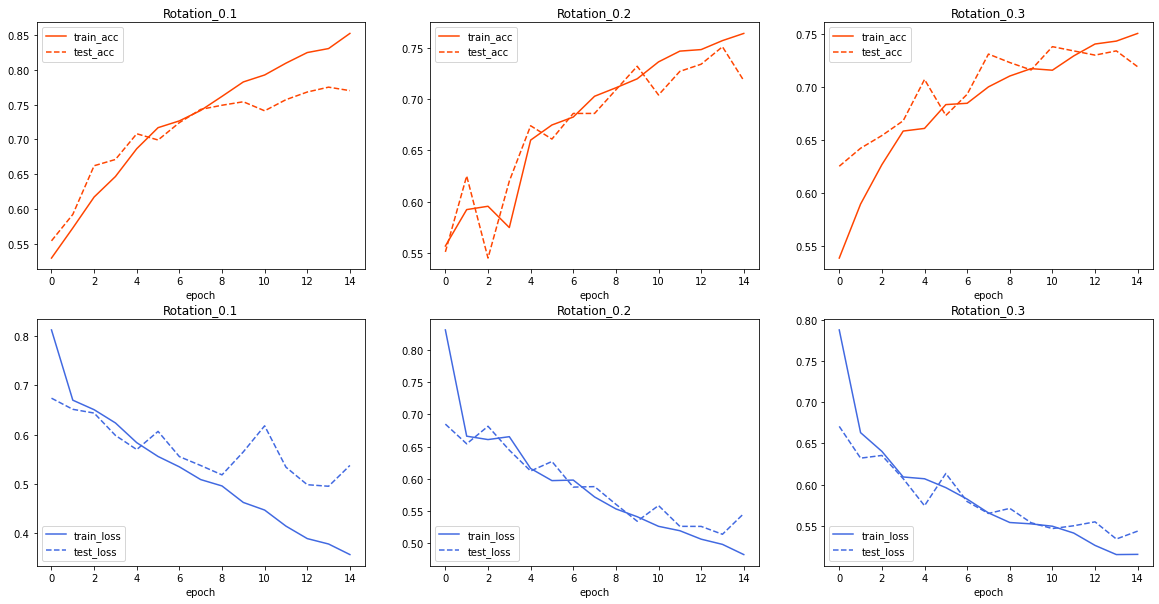

In [326]:
fig,axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].plot(result_df['acc'][7],'orangered',label='train_acc')
axs[0,0].plot(result_df['test_acc'][7],'orangered',linestyle='--',label='test_acc')
axs[0,0].set_title('Rotation_0.1')
axs[0,0].legend(loc='upper left')


axs[0,1].plot(result_df['acc'][8],'orangered',label='train_acc')
axs[0,1].plot(result_df['test_acc'][8],'orangered',linestyle='--',label='test_acc')
axs[0,1].set_title('Rotation_0.2')
axs[0,1].legend(loc='upper left')



axs[0,2].plot(result_df['acc'][9],'orangered',label='train_acc')
axs[0,2].plot(result_df['test_acc'][9],'orangered',linestyle='--',label='test_acc')
axs[0,2].set_title('Rotation_0.3')
axs[0,2].legend(loc='upper left')

    
axs[1,0].plot(result_df['loss'][7],'royalblue',label='train_loss')
axs[1,0].plot(result_df['test_loss'][7],'royalblue',linestyle='--',label='test_loss')
axs[1,0].set_title('Rotation_0.1')
axs[1,0].legend(loc='lower left')


axs[1,1].plot(result_df['loss'][8],'royalblue',label='train_loss')
axs[1,1].plot(result_df['test_loss'][8],'royalblue',linestyle='--',label='test_loss')
axs[1,1].set_title('Rotation_0.2')
axs[1,1].legend(loc='lower left')


axs[1,2].plot(result_df['loss'][9],'royalblue',label='train_loss')
axs[1,2].plot(result_df['test_loss'][9],'royalblue',linestyle='--',label='test_loss')
axs[1,2].set_title('Rotation_0.3')
axs[1,2].legend(loc='lower left')


axs[0,0].set_xlabel('epoch')
axs[0,1].set_xlabel('epoch')
axs[0,2].set_xlabel('epoch')
axs[1,0].set_xlabel('epoch')
axs[1,1].set_xlabel('epoch')
axs[1,2].set_xlabel('epoch')
plt.show()

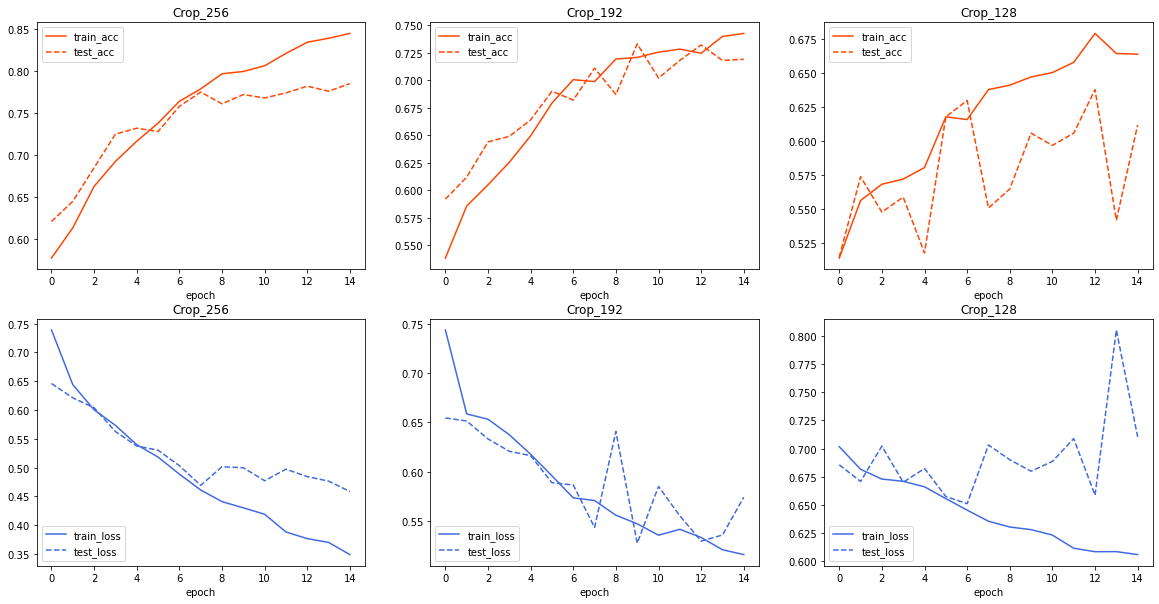

In [325]:
fig,axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].plot(result_df['acc'][10],'orangered',label='train_acc')
axs[0,0].plot(result_df['test_acc'][10],'orangered',linestyle='--',label='test_acc')
axs[0,0].set_title('Crop_256')
axs[0,0].legend(loc='upper left')


axs[0,1].plot(result_df['acc'][11],'orangered',label='train_acc')
axs[0,1].plot(result_df['test_acc'][11],'orangered',linestyle='--',label='test_acc')
axs[0,1].set_title('Crop_192')
axs[0,1].legend(loc='upper left')



axs[0,2].plot(result_df['acc'][12],'orangered',label='train_acc')
axs[0,2].plot(result_df['test_acc'][12],'orangered',linestyle='--',label='test_acc')
axs[0,2].set_title('Crop_128')
axs[0,2].legend(loc='upper left')

    
axs[1,0].plot(result_df['loss'][10],'royalblue',label='train_loss')
axs[1,0].plot(result_df['test_loss'][10],'royalblue',linestyle='--',label='test_loss')
axs[1,0].set_title('Crop_256')
axs[1,0].legend(loc='lower left')


axs[1,1].plot(result_df['loss'][11],'royalblue',label='train_loss')
axs[1,1].plot(result_df['test_loss'][11],'royalblue',linestyle='--',label='test_loss')
axs[1,1].set_title('Crop_192')
axs[1,1].legend(loc='lower left')


axs[1,2].plot(result_df['loss'][12],'royalblue',label='train_loss')
axs[1,2].plot(result_df['test_loss'][12],'royalblue',linestyle='--',label='test_loss')
axs[1,2].set_title('Crop_128')
axs[1,2].legend(loc='lower left')


axs[0,0].set_xlabel('epoch')
axs[0,1].set_xlabel('epoch')
axs[0,2].set_xlabel('epoch')
axs[1,0].set_xlabel('epoch')
axs[1,1].set_xlabel('epoch')
axs[1,2].set_xlabel('epoch')
plt.show()

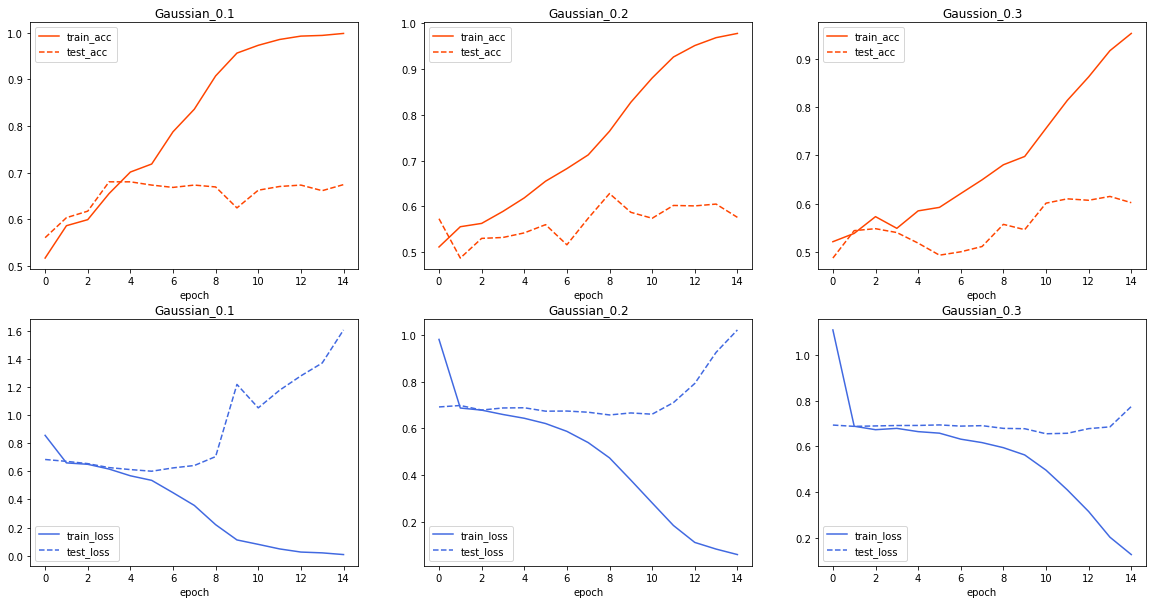

In [324]:
fig,axs = plt.subplots(2,3,figsize=(20,10))
axs[0,0].plot(result_df['acc'][13],'orangered',label='train_acc')
axs[0,0].plot(result_df['test_acc'][13],'orangered',linestyle='--',label='test_acc')
axs[0,0].set_title('Gaussian_0.1')
axs[0,0].legend(loc='upper left')


axs[0,1].plot(result_df['acc'][14],'orangered',label='train_acc')
axs[0,1].plot(result_df['test_acc'][14],'orangered',linestyle='--',label='test_acc')
axs[0,1].set_title('Gaussian_0.2')
axs[0,1].legend(loc='upper left')



axs[0,2].plot(result_df['acc'][15],'orangered',label='train_acc')
axs[0,2].plot(result_df['test_acc'][15],'orangered',linestyle='--',label='test_acc')
axs[0,2].set_title('Gaussion_0.3')
axs[0,2].legend(loc='upper left')

    
axs[1,0].plot(result_df['loss'][13],'royalblue',label='train_loss')
axs[1,0].plot(result_df['test_loss'][13],'royalblue',linestyle='--',label='test_loss')
axs[1,0].set_title('Gaussian_0.1')
axs[1,0].legend(loc='lower left')


axs[1,1].plot(result_df['loss'][14],'royalblue',label='train_loss')
axs[1,1].plot(result_df['test_loss'][14],'royalblue',linestyle='--',label='test_loss')
axs[1,1].set_title('Gaussian_0.2')
axs[1,1].legend(loc='lower left')


axs[1,2].plot(result_df['loss'][15],'royalblue',label='train_loss')
axs[1,2].plot(result_df['test_loss'][15],'royalblue',linestyle='--',label='test_loss')
axs[1,2].set_title('Gaussian_0.3')
axs[1,2].legend(loc='lower left')


axs[0,0].set_xlabel('epoch')
axs[0,1].set_xlabel('epoch')
axs[0,2].set_xlabel('epoch')
axs[1,0].set_xlabel('epoch')
axs[1,1].set_xlabel('epoch')
axs[1,2].set_xlabel('epoch')
plt.show()

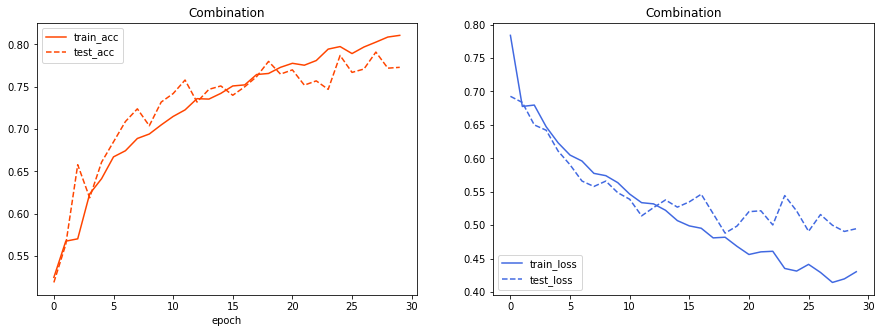

In [382]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(result_df['acc'][16],'orangered',label='train_acc')
axs[0].plot(result_df['test_acc'][16],'orangered',linestyle='--',label='test_acc')
axs[0].set_title('Combination')
axs[0].legend(loc='upper left')

axs[1].plot(result_df['loss'][16],'royalblue',label='train_loss')
axs[1].plot(result_df['test_loss'][16],'royalblue',linestyle='--',label='test_loss')
axs[1].set_title('Combination')
axs[1].legend(loc='lower left')
axs[0].set_xlabel('epoch')
axs[0].set_xlabel('epoch')
plt.show()
